In [2]:
import sys
 
sys.path.insert(0, "../")

from EnsembleFramework import Framework

In [3]:
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
from torch_geometric.utils import add_self_loops

dataset_name = 'Cora'
split = "public"
dataset = Planetoid(root='/tmp/Cora', name=dataset_name, split=split)
dataset.transform = T.NormalizeFeatures()

features =  dataset[0].x
y =  dataset[0].y

test =  dataset[0].test_mask
train = dataset[0].train_mask
val =  dataset[0].val_mask

edge_index = dataset[0].edge_index 
edge_index = add_self_loops(edge_index)[0]

In [4]:
# hops_to_best_params = {0: {'C': 17.397735078826578,
#   'degree': 3,
#   'gamma': 'auto',
#   'kernel': 'linear',
#   'tol': 3.081194015351342e-05},
#  1: {'C': 125.27090449369274,
#   'degree': 2,
#   'gamma': 'scale',
#   'kernel': 'rbf',
#   'tol': 7.538232035206263e-05},
#  2: {'C': 1.7067069155992902,
#   'degree': 4,
#   'gamma': 'scale',
#   'kernel': 'rbf',
#   'tol': 0.0023400881309122677},
#  3: {'C': 1.4346874137617378,
#   'degree': 4,
#   'gamma': 'auto',
#   'kernel': 'linear',
#   'tol': 0.003742036117254964},
#  5: {'C': 3.7235631574014274,
#   'degree': 2,
#   'gamma': 'scale',
#   'kernel': 'linear',
#   'tol': 0.0008054106770110825},
#  10: {'C': 4.191360616220359,
#   'degree': 4,
#   'gamma': 'auto',
#   'kernel': 'linear',
#   'tol': 0.03828673736877626}}

In [5]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_tsne(scores):
    node_labels = y.cpu().numpy()
    num_classes = len(set(node_labels))
    
    t_sne_embeddings = TSNE(n_components=2, perplexity=30, method='barnes_hut').fit_transform(scores)
    
    fig = plt.figure(figsize=(12,8), dpi=80)  # otherwise plots are really small in Jupyter Notebook
    cora_label_to_color_map = {0: "red", 1: "blue", 2: "green", 3: "orange", 4: "yellow", 5: "pink", 6: "gray"}
    for class_id in range(num_classes):
        
        plt.scatter(t_sne_embeddings[node_labels == class_id, 0], t_sne_embeddings[node_labels == class_id, 1], s=20, color=cora_label_to_color_map[class_id], edgecolors='black', linewidths=0.2)
    plt.show()

In [6]:
import pandas as pd
import ast
hops_to_best_params_df = pd.read_csv("normalized_origin_features_plus_summed_neighbors_wo_attn.csv")
evaluated_hops = hops_to_best_params_df.iloc[:,0].values
best_params = hops_to_best_params_df.iloc[:,1].values
hops_to_best_params = dict({hop: ast.literal_eval(best_params[i]) for i, hop in enumerate(evaluated_hops)})
hops_to_best_params

{0: {'C': 147.40101960911528,
  'degree': 4,
  'gamma': 'scale',
  'kernel': 'linear',
  'tol': 0.032348744462783297},
 1: {'C': 90.60017807898211,
  'degree': 4,
  'gamma': 'scale',
  'kernel': 'rbf',
  'tol': 7.378814842802672e-05},
 2: {'C': 117.92124212871212,
  'degree': 3,
  'gamma': 'scale',
  'kernel': 'rbf',
  'tol': 7.629455079233519e-05},
 3: {'C': 2.7748532252182674,
  'degree': 2,
  'gamma': 'auto',
  'kernel': 'linear',
  'tol': 0.0006908214882774943},
 4: {'C': 5.669251187871323,
  'degree': 4,
  'gamma': 'scale',
  'kernel': 'linear',
  'tol': 0.0001238784928725844},
 5: {'C': 6.588290370053819,
  'degree': 2,
  'gamma': 'auto',
  'kernel': 'linear',
  'tol': 0.0017951747340170458},
 6: {'C': 3.4290311790983417,
  'degree': 4,
  'gamma': 'scale',
  'kernel': 'sigmoid',
  'tol': 0.002238433581550908},
 7: {'C': 5.815909573106612,
  'degree': 4,
  'gamma': 'auto',
  'kernel': 'linear',
  'tol': 0.0003357252662322444},
 8: {'C': 5.909413674525595,
  'degree': 2,
  'gamma':

SVC [0] hops has the following accuracies:
Train acc: 1.0; Val acc 0.582; Test acc 0.59
The required training time was 0.12 s


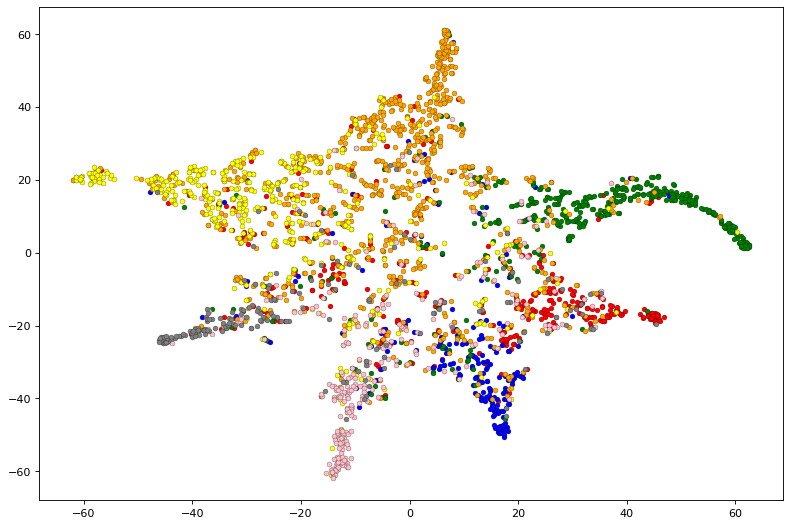

SVC [1] hops has the following accuracies:
Train acc: 1.0; Val acc 0.772; Test acc 0.781
The required training time was 0.1 s


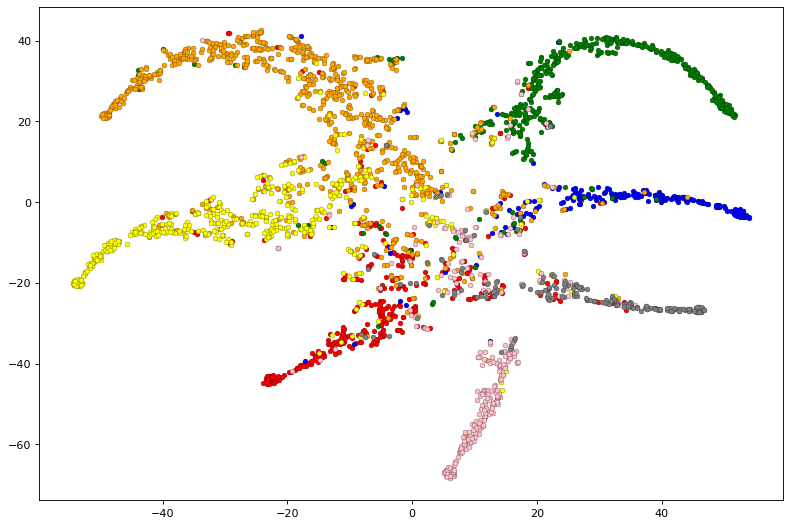

SVC [2] hops has the following accuracies:
Train acc: 1.0; Val acc 0.812; Test acc 0.817
The required training time was 0.13 s


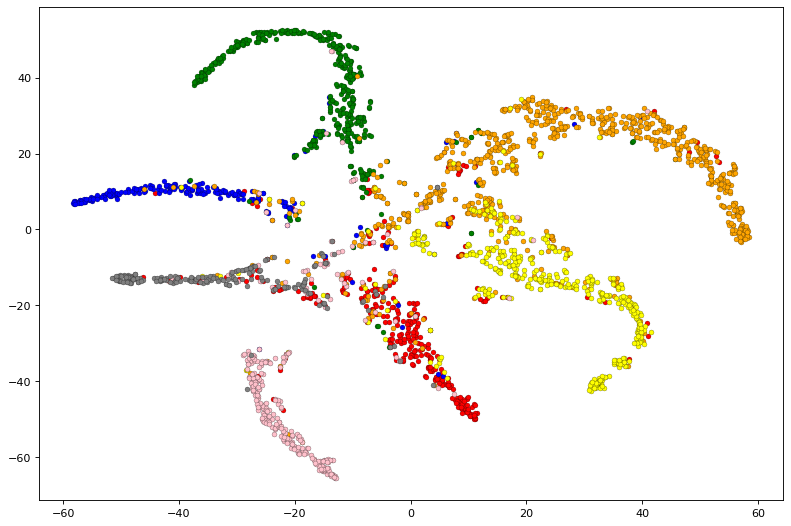

SVC [3] hops has the following accuracies:
Train acc: 0.9928571428571429; Val acc 0.804; Test acc 0.816
The required training time was 0.13 s


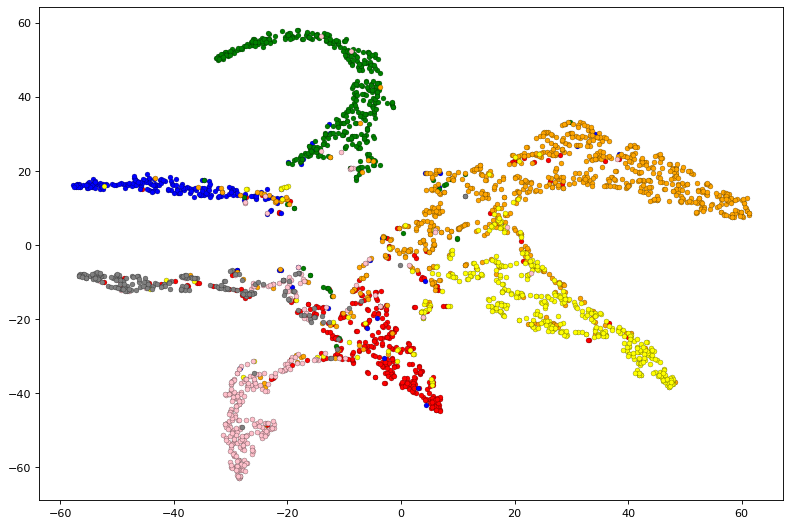

SVC [4] hops has the following accuracies:
Train acc: 0.9928571428571429; Val acc 0.8; Test acc 0.808
The required training time was 0.16 s


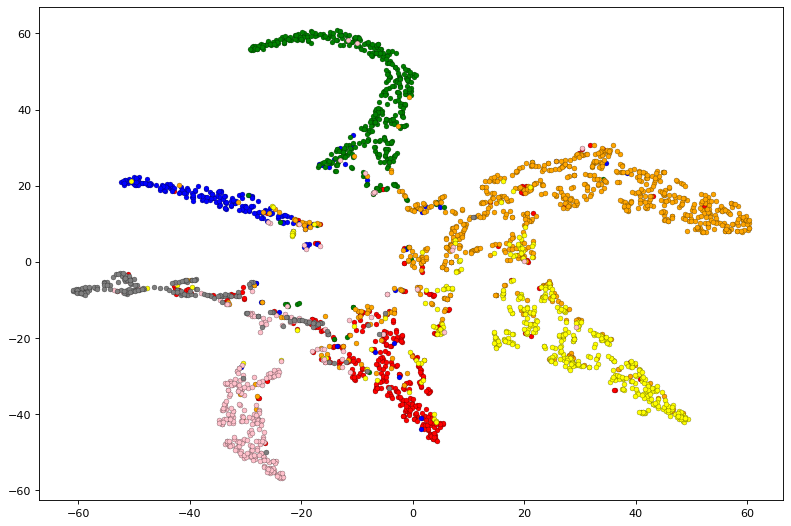

SVC [5] hops has the following accuracies:
Train acc: 0.9928571428571429; Val acc 0.806; Test acc 0.81
The required training time was 0.18 s


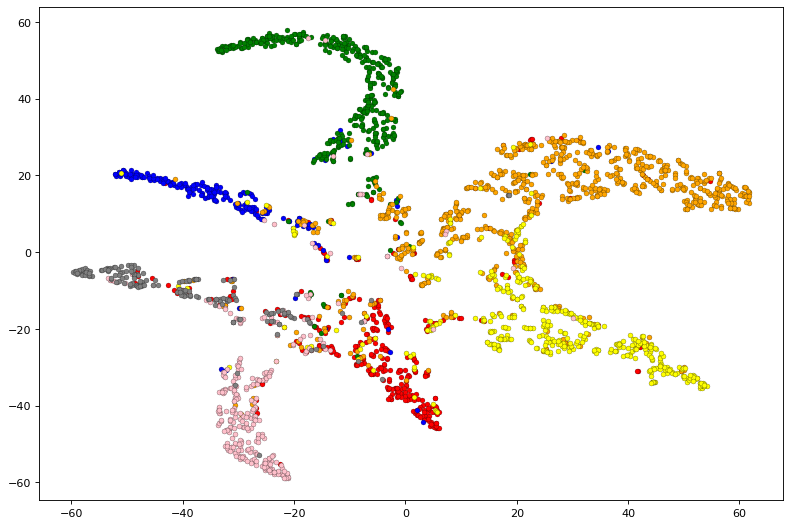

SVC [6] hops has the following accuracies:
Train acc: 0.9642857142857143; Val acc 0.816; Test acc 0.828
The required training time was 0.19 s


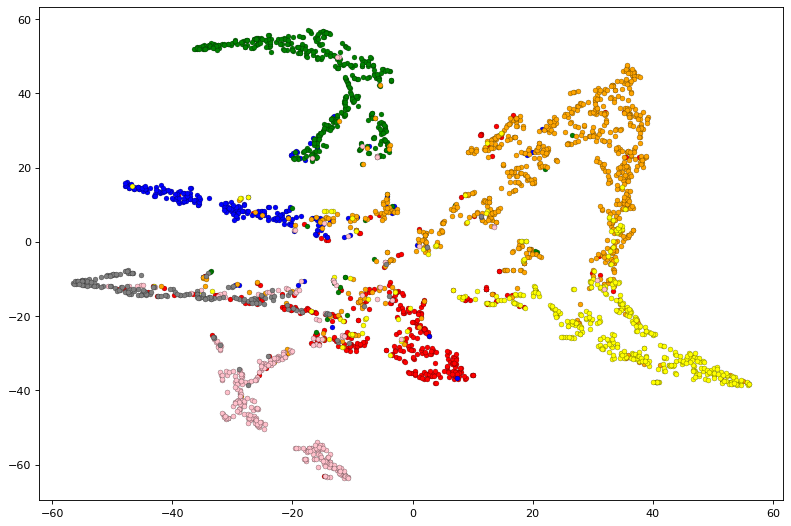

SVC [7] hops has the following accuracies:
Train acc: 0.9928571428571429; Val acc 0.8; Test acc 0.82
The required training time was 0.22 s


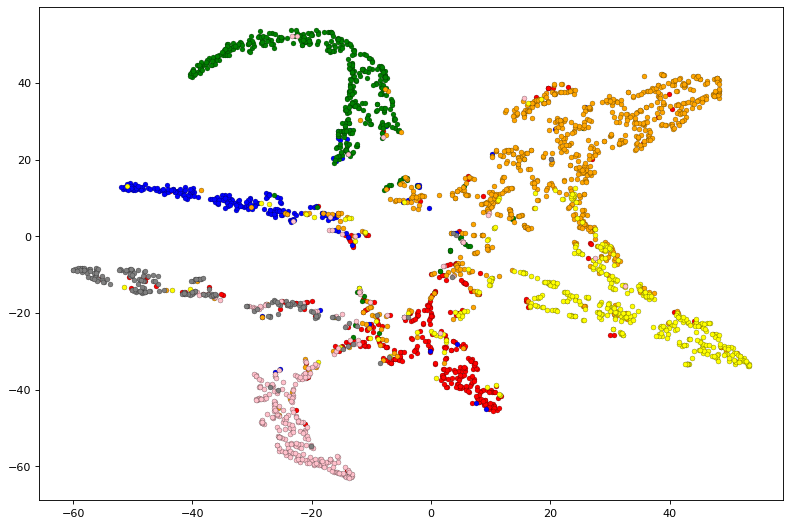

SVC [8] hops has the following accuracies:
Train acc: 0.9642857142857143; Val acc 0.806; Test acc 0.823
The required training time was 0.24 s


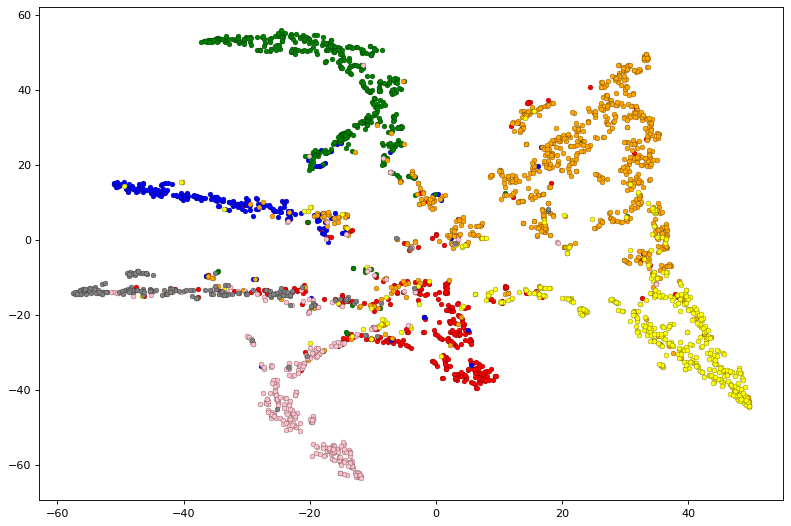

SVC [9] hops has the following accuracies:
Train acc: 0.9785714285714285; Val acc 0.802; Test acc 0.817
The required training time was 0.27 s


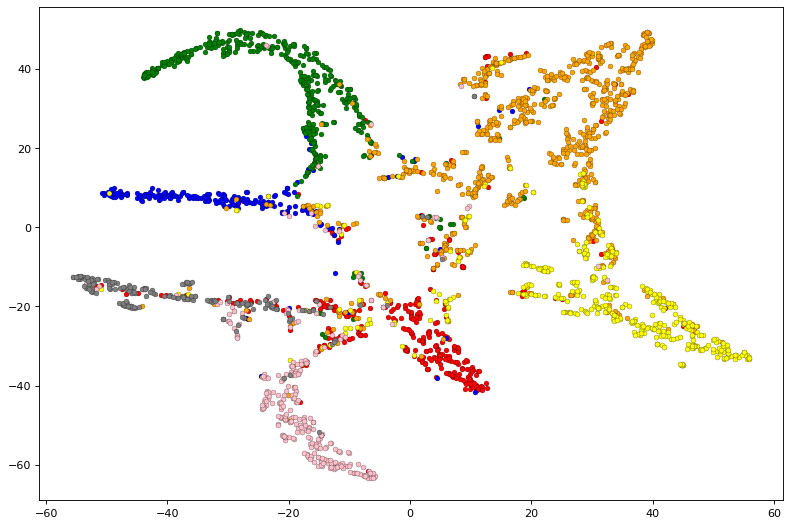

SVC [10] hops has the following accuracies:
Train acc: 0.9857142857142858; Val acc 0.804; Test acc 0.812
The required training time was 0.31 s


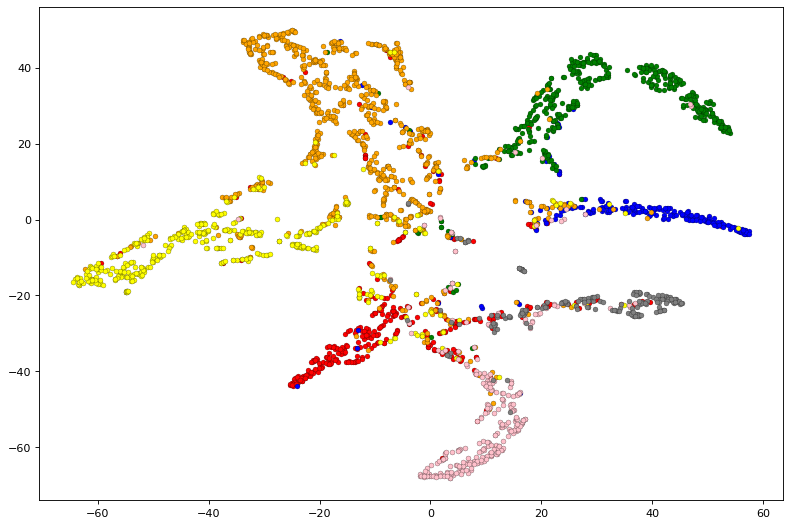

SVC [15] hops has the following accuracies:
Train acc: 0.95; Val acc 0.816; Test acc 0.826
The required training time was 0.42 s


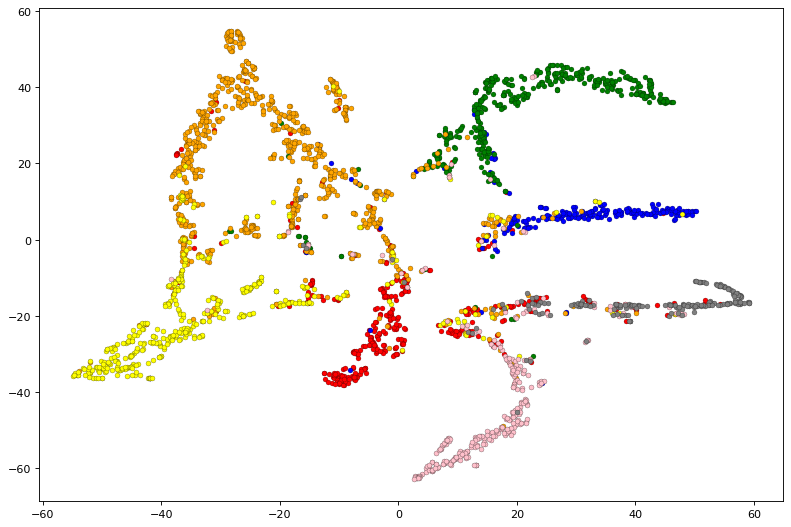

SVC [20] hops has the following accuracies:
Train acc: 0.9428571428571428; Val acc 0.814; Test acc 0.823
The required training time was 0.54 s


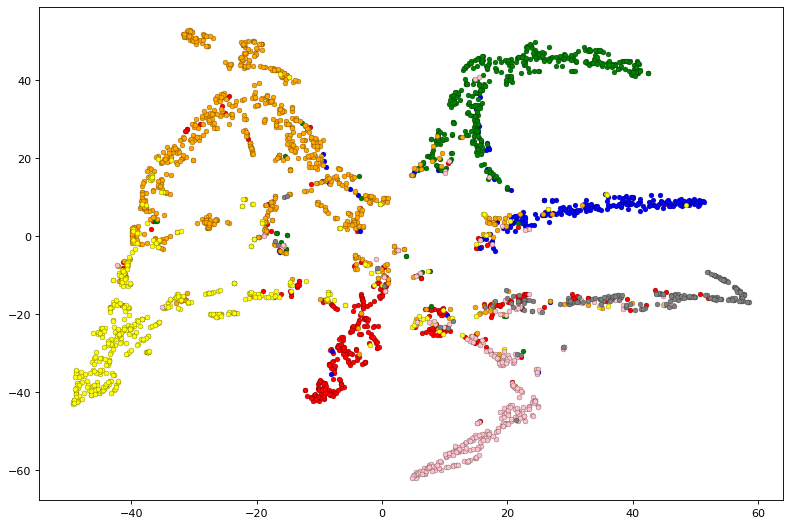

SVC [30] hops has the following accuracies:
Train acc: 0.9928571428571429; Val acc 0.802; Test acc 0.811
The required training time was 0.79 s


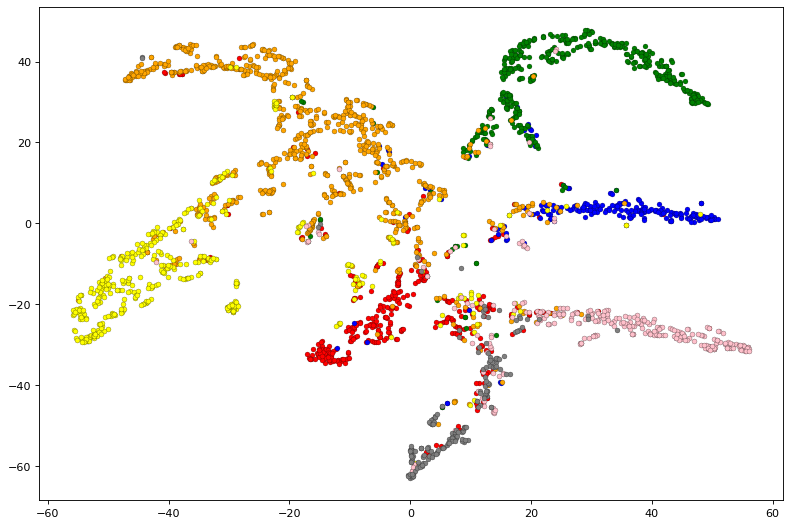

SVC [40] hops has the following accuracies:
Train acc: 0.9857142857142858; Val acc 0.804; Test acc 0.812
The required training time was 1.05 s


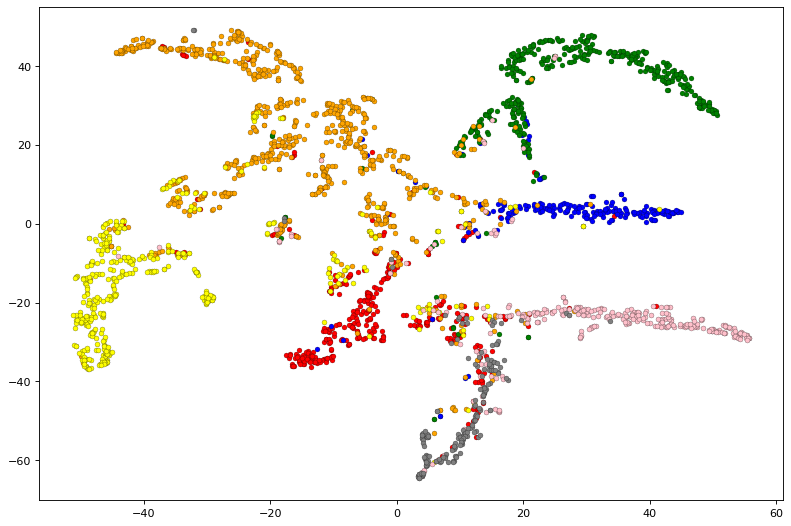

SVC [50] hops has the following accuracies:
Train acc: 0.9928571428571429; Val acc 0.802; Test acc 0.81
The required training time was 1.32 s


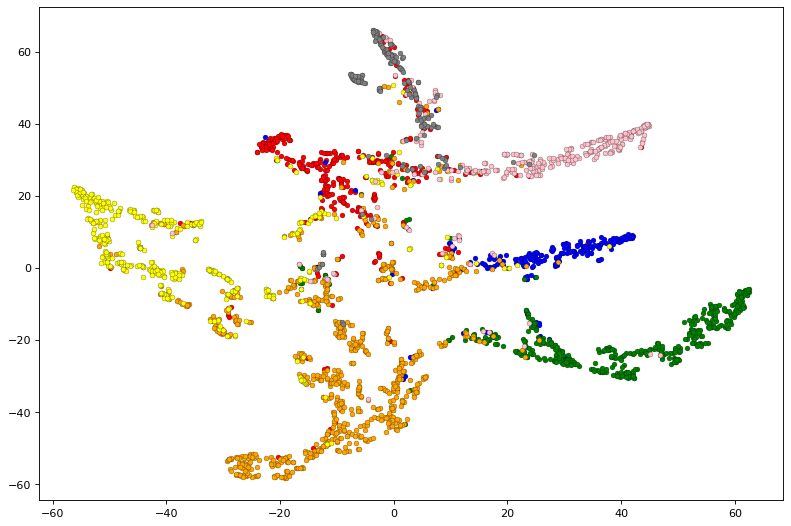

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
import torch
from torch.nn.functional import normalize

def user_function(kwargs):
    return  normalize(kwargs["original_features"] + kwargs["summed_neighbors"], p = 2.0, dim = 1)
    
for hop in evaluated_hops:
    hops_list = [hop]
    
    clfs = [
        SVC(**hops_to_best_params[hops], random_state = 42, probability= True) for hops in hops_list
    ]
    framework = Framework([user_function for i in hops_list], 
                         hops_list=hops_list, ## to obtain best for local neighborhood
                         clfs=clfs,
                         gpu_idx=0,
                         handle_nan=0.0,
                        attention_configs=[None for i in hops_list])
    start = time.time()
    framework.fit(features,
                edge_index,
                y,
                train)
    train_time = time.time()-start
    
    y_pred_val = framework.predict(features,
                    edge_index,
                    val)
    y_pred_test = framework.predict(features,
                    edge_index,
                    test)
    y_pred_train = framework.predict(features,
                    edge_index,
                    train)
    y_pred_proba = framework.predict_proba(features,
                    edge_index,
                    torch.ones_like(y).type(torch.bool))
    val_score = accuracy_score(y[val], y_pred_val)
    test_score = accuracy_score(y[test], y_pred_test)
    train_score = accuracy_score(y[train], y_pred_train)
    print(f"SVC {str(hops_list)} hops has the following accuracies:\nTrain acc: {str(train_score)}; Val acc {str(val_score)}; Test acc {str(test_score)}")
    print(f"The required training time was {str(round(train_time,2))} s")
    plot_tsne(y_pred_proba)